<a href="https://colab.research.google.com/github/Christianib003/water-quality-model/blob/master/notebooks/%5BIrenee_Gisubizo_Dusingizimana%5D_water_quality_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FORMATIVE ASSIGNMENT II: WATER QUALITY MODEL

## 1. Introduction
**Assignment**: Building a Classification Model Using Neural Networks

**Objective:**
Develop a neural network-based classification model using a provided dataset, incorporating multiple optimization techniques and ensuring equitable group contribution.

**In this notebook, we will take the cleaned and imputed dataset and use it to train, test, and evaluate a deep learning model**:

The key steps we'll cover are:
1. Loading the preprocessed (imputed) dataset.
2. Separating features and the target variable.
3. Splitting the dataset into three distinct portions: training, validation, and testing sets. This is crucial for robust model development and evaluation.
4. Applying feature scaling (StandardScaler) correctly after the split to prevent data leakage.

**Note:** The data cleaning and imputation steps were performed in a previous notebook.
If you'd like to review that process, please refer to: [Data Preprocessing Notebook](data_preprocessing.ipynb).

**Model Details**


| Engineer Name     | Regularizer | Optimizer | Early Stopping  | Dropout Rate | Learning Rate |
| ----------------- | ---------------------------- | --------- | ------------------------------------------------ | ------------ | ------------- |
| Irenee Dusingizimana | L2           | AdamW      | Patience=10                 | 0.01        | 0.0001       |



In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import AdamW

In [2]:
# Mount Google Drive if using Google Colab
from google.colab import drive # Import the necessary library for Google Colab
drive.mount('/content/drive') # Mount your Google Drive

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/imputed_water_potability_data.csv')
data.head()

Mounted at /content/drive


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Plotting the data

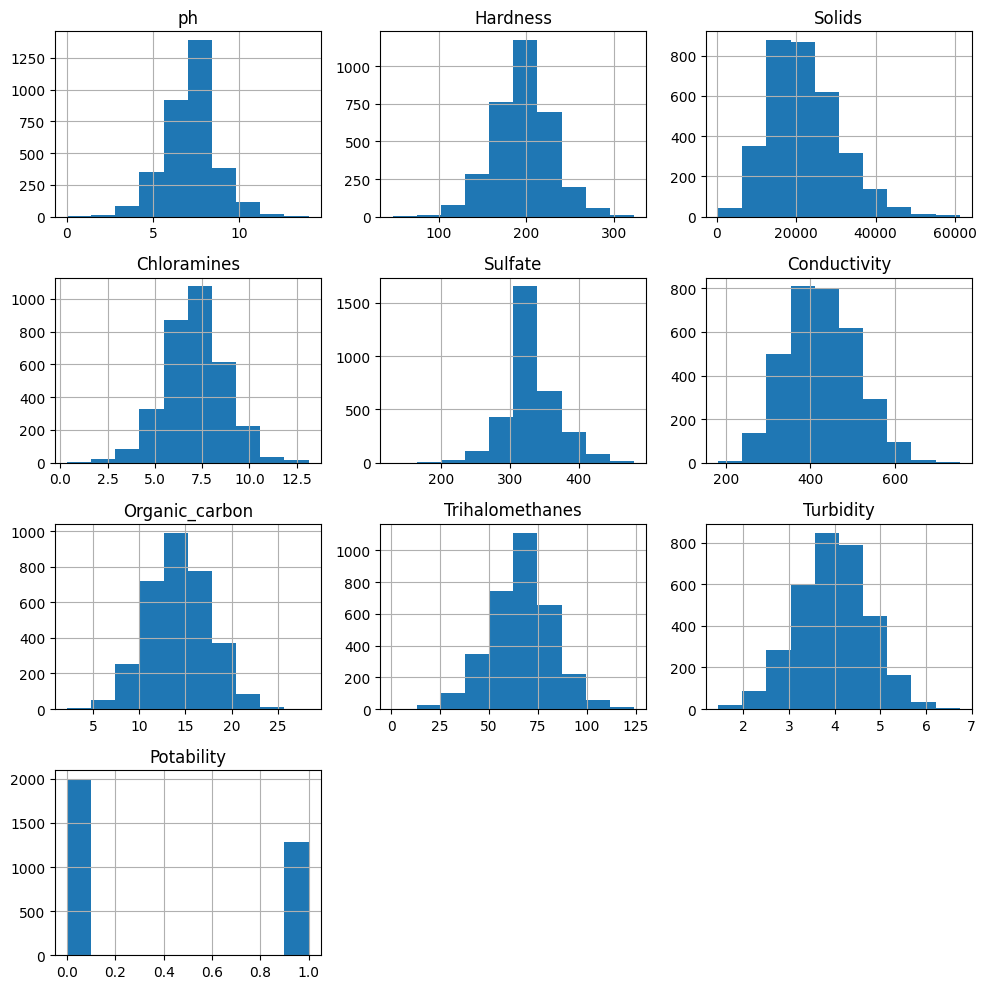

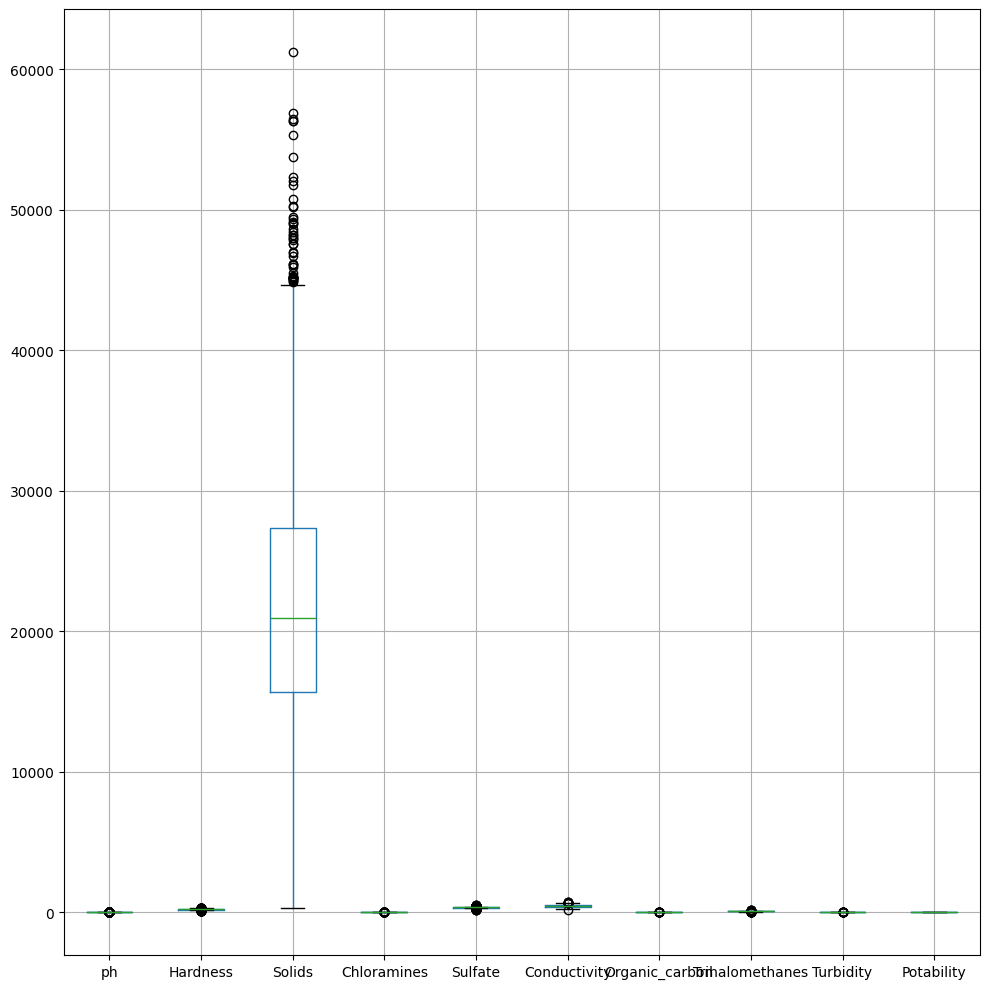

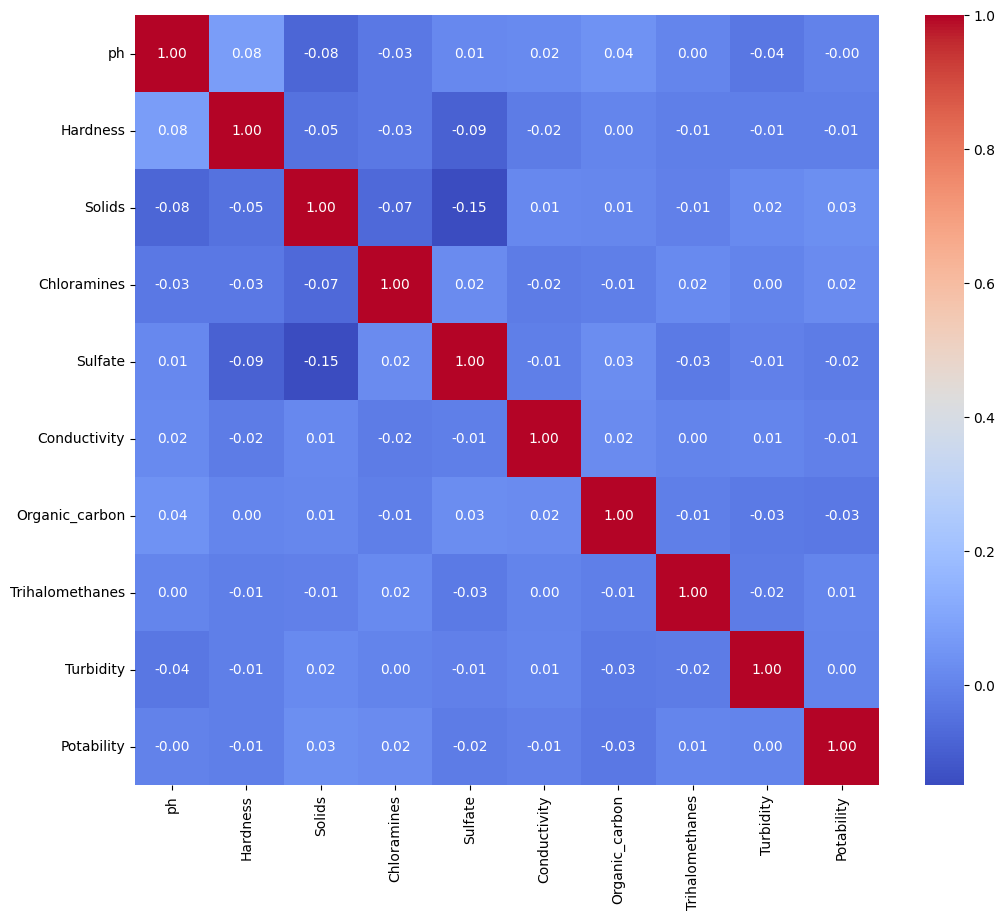

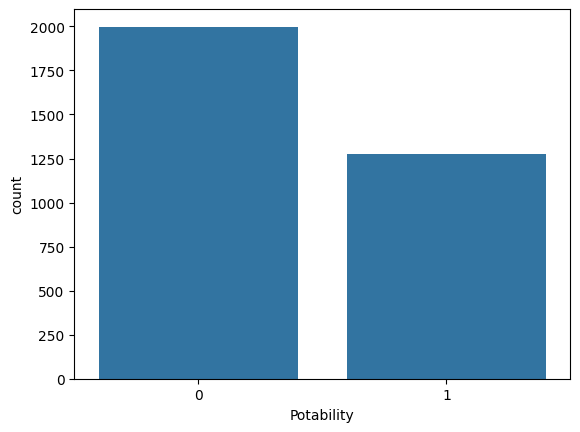

In [3]:
# plot the data

data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

data.boxplot(figsize=(10, 10))
plt.tight_layout()
plt.show()

import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

sns.countplot(x='Potability', data=data)
plt.show()

In [4]:
# show how many missing values and handle them by filling in the mean

print(data.isnull().sum())
data = data.fillna(data.mean())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [5]:
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
